Training a Logistic Regression Model For SLA-Breach Classification

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report
import joblib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

In [2]:
df = pd.read_csv('C://Users//acer//Desktop//Infinity AI Work//InfinityStyleVerse//backend//app//FlowGateOS_AI//features.csv')

# Preparing features and target
features = ['latency_ms', 'queue_time_ms', 'mean_latency_ms', 'var_latency_ms']
X = df[features]
y = df['sla_breach']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Training the model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [6]:
# Predicting probabilities and classes
y_pred_prob = model.predict_proba(X_test)[:, 1] 
y_pred = model.predict(X_test)

In [7]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.2f}")

# Classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# AUC-ROC Score
auc_roc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC-ROC Score: {auc_roc:.2f}")

Accuracy Score: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        17

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

AUC-ROC Score: 1.00


The Confusion Matrix

In [8]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[23  0]
 [ 0 17]]


<Axes: >

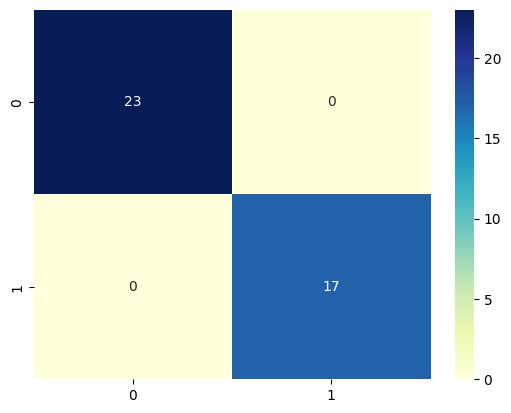

In [10]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')


The ROC Curve

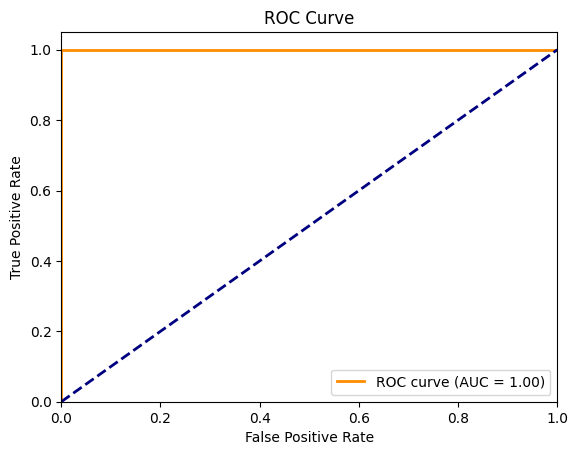

In [11]:
# ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_roc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Saving the model

In [12]:
# Saving the model
joblib.dump(model, 'sla_model.pkl')
print("Model trained and saved as sla_model.pkl")

Model trained and saved as sla_model.pkl


Testing the "predict/sla_risk" endpoint

In [1]:
import requests
import time

latencies = []
for _ in range(100):
    start = time.time()
    response = requests.post("http://127.0.0.1:8000/predict/sla_risk", json={
        "latency_ms": 3000, "queue_time_ms": 0, "mean_latency_ms": 3085.44, "var_latency_ms": 3049344.77
    })
    latency = (time.time() - start) * 1000
    latencies.append(latency)
p95_latency = sorted(latencies)[int(len(latencies) * 0.95) - 1]
print(f"P95 Latency: {p95_latency:.2f}ms")

P95 Latency: 17.48ms
